In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import i0,i1,k0,k1
from scipy.constants import G
from scipy.constants import parsec as pc
msun=1.989e+30
kpc=1e+3*pc
g1=4.302e-6

In [2]:
def vgas(r,mh1,rd):
    sigma0=(2*mh1)/(3*np.pi*rd**2)
    c=4*np.pi*G*sigma0*rd
    sec=i0(r/(2*rd))*k0(r/(2*rd))-i1(r/(2*rd))*k1(r/(2*rd))
    vd=1e-6*c*(r/(2*rd))**2*sec
    return vd

In [3]:
dir="/home/esha/Documents/anurag/nav/sparc"
column_names=["Rad","Vobs","errV","Vgas","Vdisk","Vbul","SBdisk","SBbul"]

gal_data=[]
for gal in os.listdir(dir):
    if gal.endswith('.csv'):
        gal_dir=os.path.join(dir,gal)
        data=pd.read_csv(gal_dir,names=column_names)
        data['Galaxy']=os.path.splitext(gal)[0]
        gal_data.append(data)
        
combined_gal=pd.concat(gal_data)
combined_gal.head()

,Rad,Vobs,errV,Vgas,Vdisk,Vbul,SBdisk,SBbul,Galaxy
0,0.63,262.0,73.6,-0.79,82.82,389.26,1981.83,3538.94,UGC03546
1,0.79,250.0,55.5,-0.85,98.90,366.12,1833.29,1444.35,UGC03546
2,0.95,241.0,42.9,-0.88,113.48,343.54,1695.88,614.37,UGC03546
3,1.11,234.0,31.9,-0.87,126.74,322.48,1568.78,245.76,UGC03546
4,1.27,228.0,28.8,-0.80,138.83,303.96,1451.19,56.22,UGC03546


In [4]:
meta=[]
with open('metadata.txt','r') as file:
    line=file.readlines()
for lines in line:
    field=lines.strip().split()
    meta.append(field)

In [5]:
float(meta[1][-6])

0.211

In [6]:
gal_uniq=combined_gal['Galaxy'].unique()
#gal_uniq

In [7]:
rd_guess=[]
sd_guess=[]
for i in range (len(meta)):
    if meta[i][0] in gal_uniq:
        try:
            rd_guess.append(float(meta[i][-5]))
            sd_guess.append(float(meta[i][-6])*1e+9*msun)
        except ValueError:
            print("Galaxy in Table not found in the catalogue")
    
    

In [8]:
rd_guess

[1.21,
 3.49,
 4.96,
 10.69,
 4.3,
 9.14,
 9.58,
 2.95,
 55.71,
 7.31,
 16.14,
 14.38,
 24.55,
 10.1,
 16.19,
 7.8,
 10.81,
 32.13,
 2.9,
 7.29,
 10.24,
 16.36,
 12.79,
 49.51,
 9.2,
 44.99,
 18.16,
 30.49,
 13.79,
 45.12,
 13.76,
 7.16,
 40.34,
 3.04,
 43.58,
 6.0,
 35.66,
 18.85,
 4.2,
 22.57,
 11.47,
 20.84,
 13.72,
 17.38,
 10.05,
 32.75,
 17.59,
 31.35,
 15.13,
 3.18,
 10.16,
 22.25,
 18.06,
 18.58,
 24.09,
 16.07,
 16.7,
 21.16,
 10.41,
 29.53,
 35.06,
 30.03,
 10.92,
 39.5,
 21.43,
 40.89,
 14.05,
 50.02,
 21.25,
 27.01,
 7.35,
 12.15,
 31.27,
 10.03,
 11.57,
 6.23,
 7.28,
 40.2,
 74.24,
 34.24,
 24.0,
 28.6,
 18.37,
 19.97,
 8.9,
 1.46,
 8.67,
 21.61,
 36.64,
 6.65,
 10.64,
 6.74,
 16.79,
 3.51,
 7.87,
 5.9,
 16.53,
 8.8,
 10.33,
 60.63,
 8.59,
 20.31,
 26.44,
 6.96,
 12.67,
 6.75,
 16.76,
 16.07,
 9.29,
 23.04,
 6.39,
 10.1,
 7.14,
 7.85,
 12.11,
 3.76,
 2.07,
 4.37,
 5.5,
 3.3,
 8.07,
 7.8,
 5.59,
 19.05,
 4.75,
 39.72,
 60.35,
 5.45,
 9.58,
 43.44,
 16.66,
 12.99,
 9.26,
 59

In [9]:
rd_guess[gal_uniq.tolist().index('UGC03546')]*10

12.1

def gas_fit(df,gal,rd_g,sd_g):
    gal_data=df[df['Galaxy']==gal]
    rad=gal_data['Rad']*kpc
    vgs=gal_data['Vgas']
    m0=(sd_g[gal_uniq.tolist().index(gal)])
    r0=rd_g[gal_uniq.tolist().index(gal)]
    low=[0.1*r0]
    up=[10*r0]
    bounds=(low,up)
    init=[r0]
    def model(r,rd):
        return vgas(r,m0,rd)
    popt,pcov=curve_fit(model,rad,vgs**2,p0=init,bounds=bounds)
    return popt
    

In [10]:
import numpy as np
from scipy.optimize import curve_fit

def gas_fit(df, gal, kpc, rd_g, sd_g):
    gal_data = df[df['Galaxy'] == gal]
    rad = gal_data['Rad'].values * kpc
    vgs = gal_data['Vgas'].values
    m0 = sd_g[gal_uniq.tolist().index(gal)]
    r0 = rd_g[gal_uniq.tolist().index(gal)]*kpc
     
    # Ensure r0 is positive to create valid bounds
    if r0 > 0:
        low = 0.1 * r0
        up = 10 * r0
    else:
        low = 0.1 * 3.73e+18
        up = 10 * 3.73e+18
    
    # Ensure the initial guess is within the bounds
    if not (low < r0 < up):
        raise ValueError(f"The initial guess r0={r0} is outside the bounds ({low}, {up})")

    bounds = ([low], [up])
    init = [r0]

    def model(r, rd):
        return vgas(r, m0, rd)

    popt, pcov = curve_fit(model, rad, vgs**2, p0=init, bounds=bounds)
    return popt

rd_val = []
gal_dir = "gas_fit.txt"

with open(gal_dir, 'w') as file:
    file.write("Galaxy\tRd\n")
    for gal in gal_uniq:
        try:
            rd_opt = gas_fit(combined_gal, gal, kpc, rd_guess, sd_guess)
            rd_val.append(rd_opt[0])
            file.write(f"{gal}\t{rd_opt[0]}\n")
        except ValueError as e:
            print(f"Error for galaxy {gal}: {e}")


In [11]:
rd_val=[]
gal_dir="gas_fit.txt"
with open(gal_dir,'w') as file:
    file.write("Galaxy\tRd\n")
    for gal in gal_uniq:
        rd_opt=gas_fit(combined_gal,gal,kpc,rd_guess,sd_guess)
        rd_val.append(rd_opt[0])
        file.write(f"{gal}\t{rd_opt[0]}\n")

/tmp/ipykernel_160494/2289394964.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


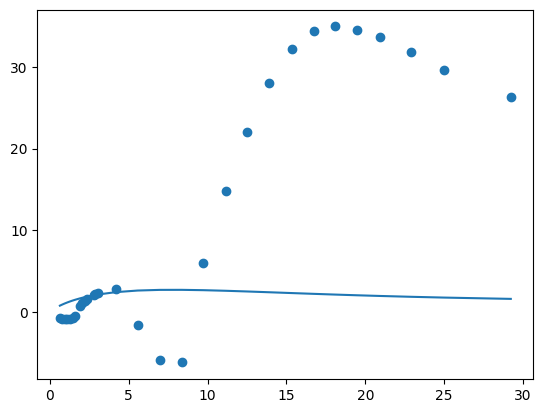

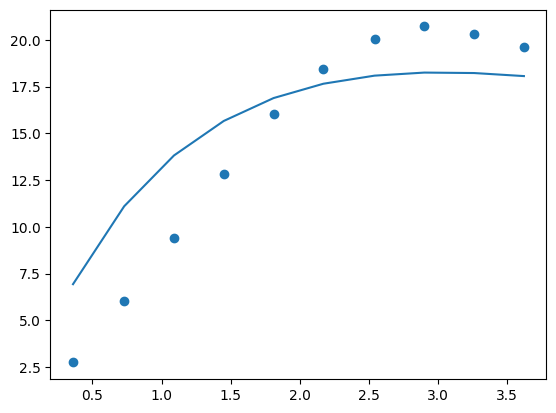

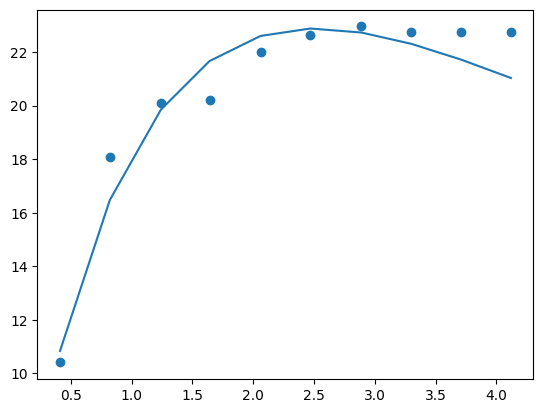

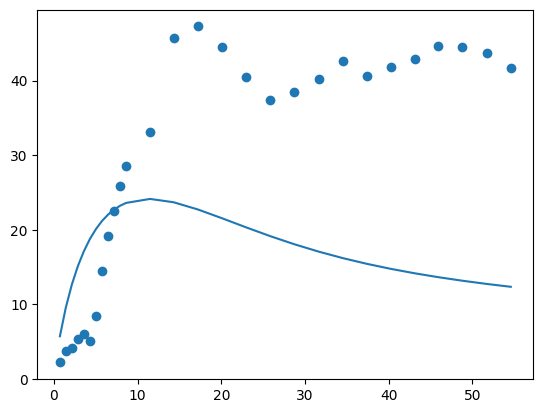

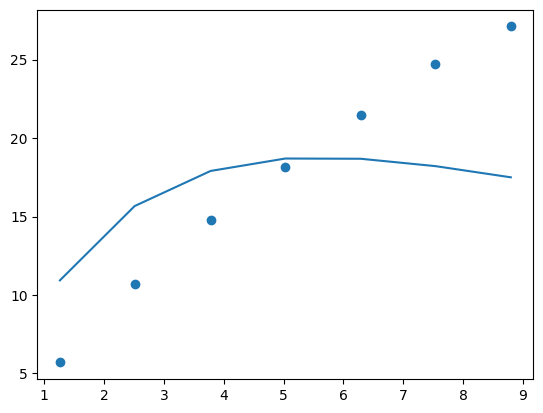

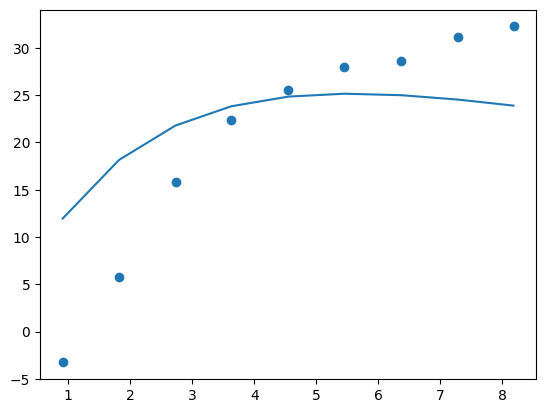

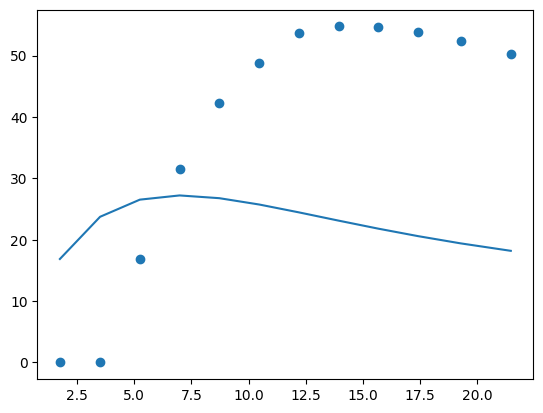

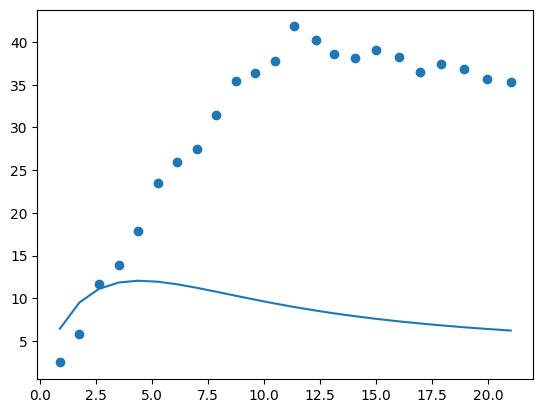

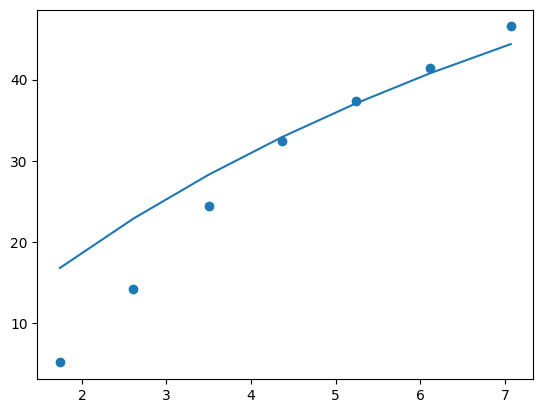

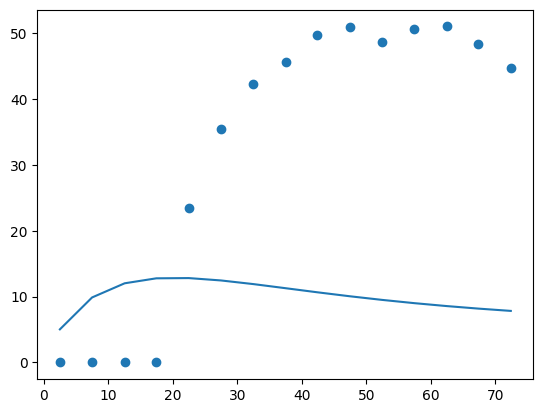

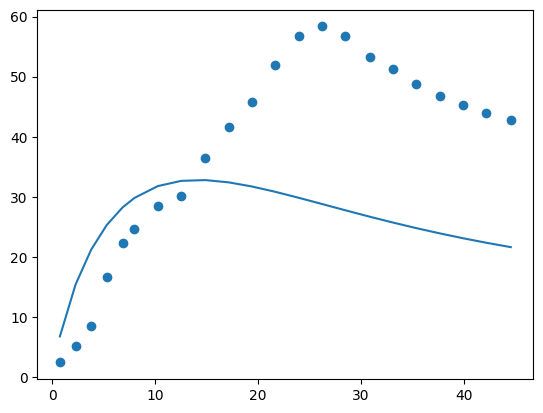

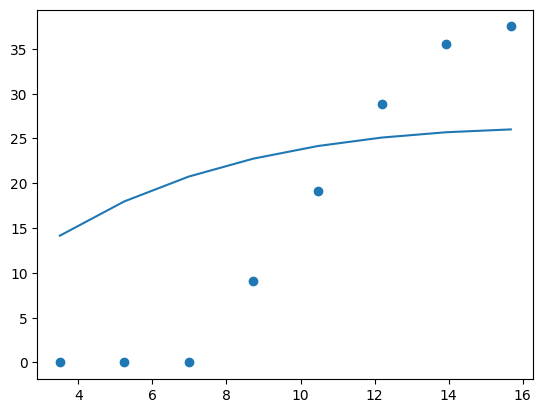

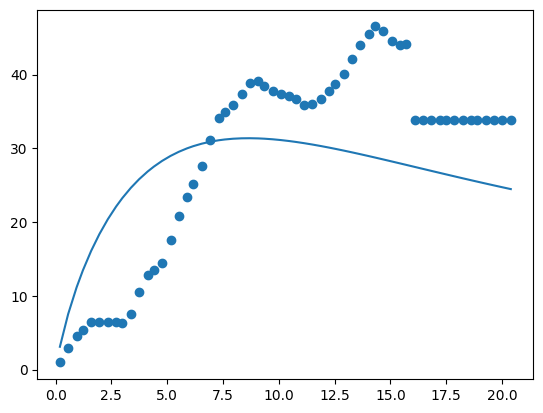

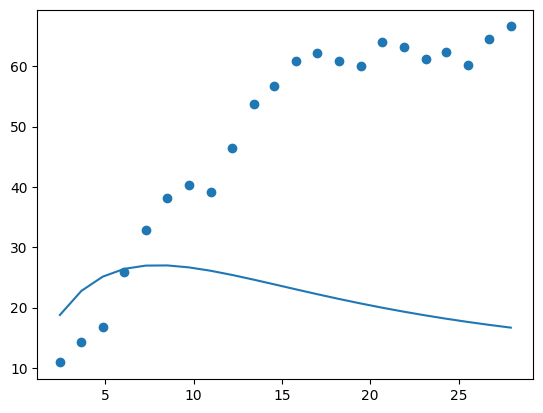

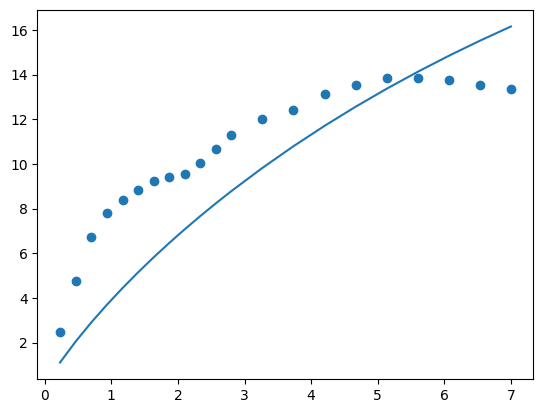

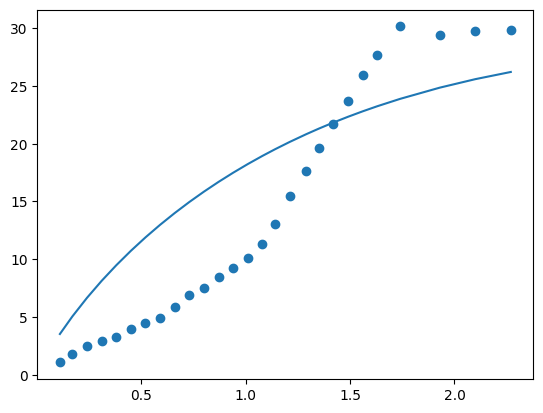

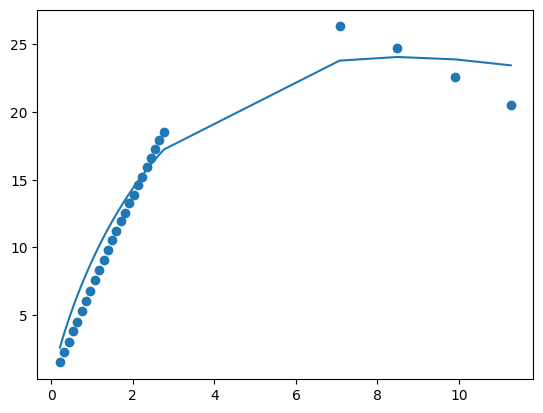

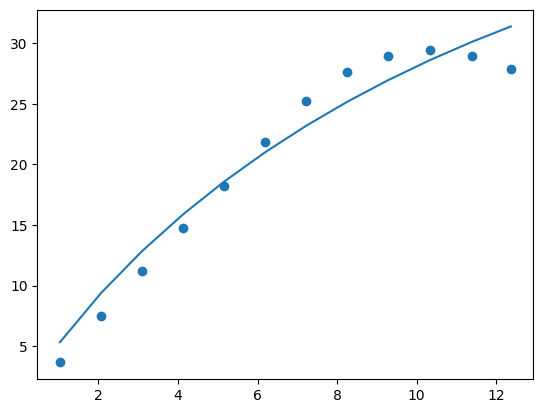

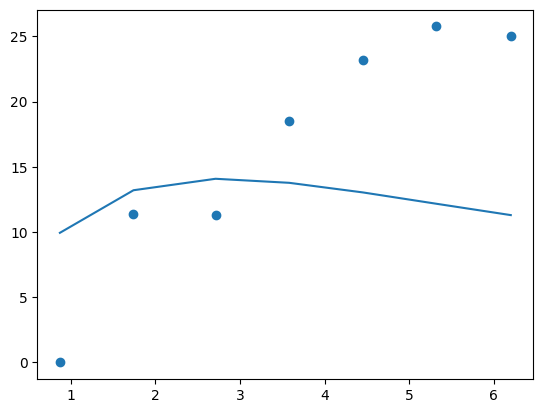

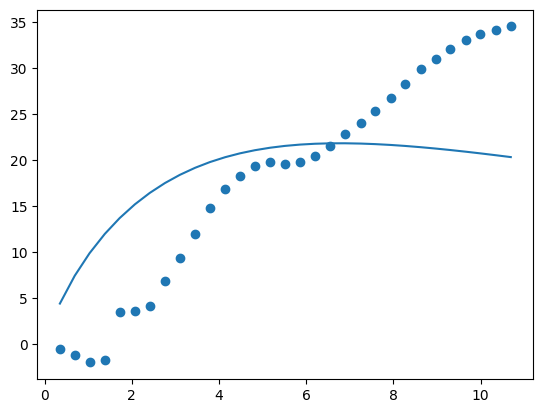

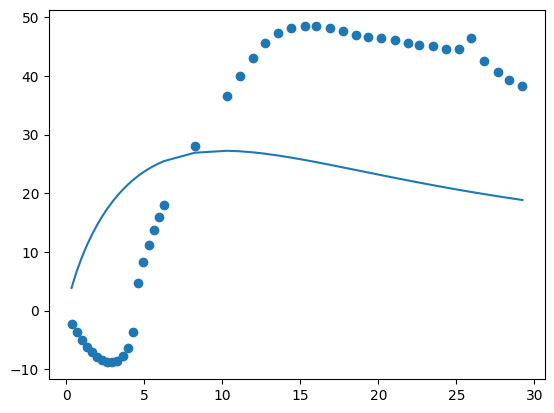

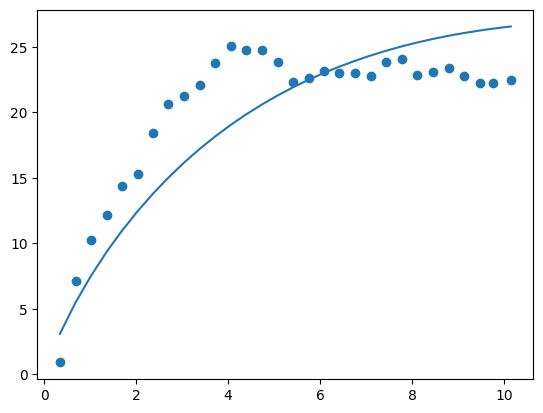

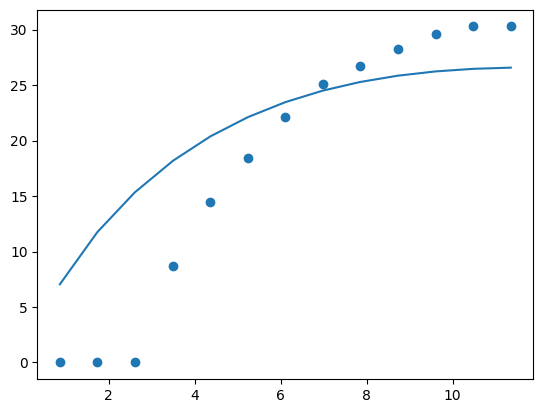

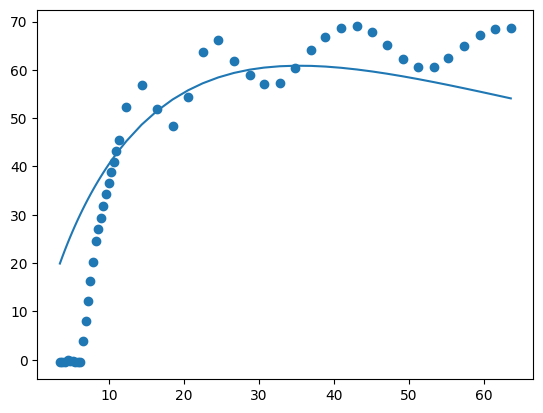

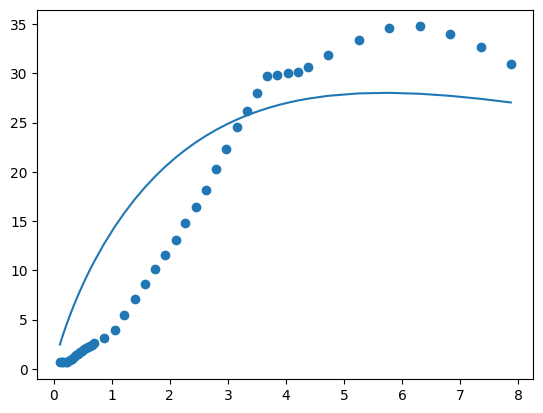

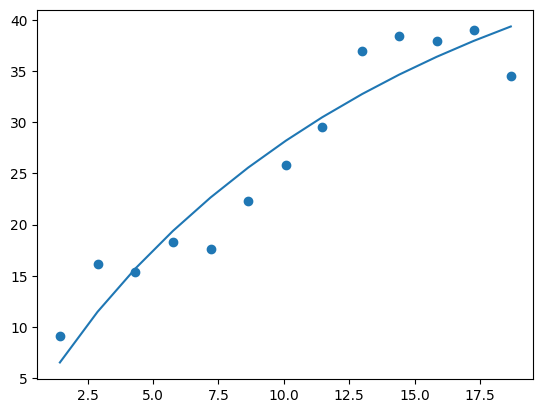

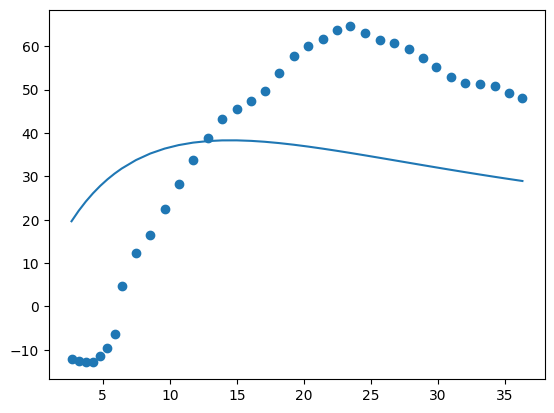

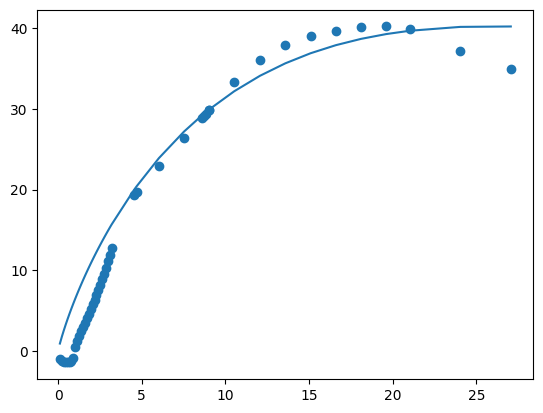

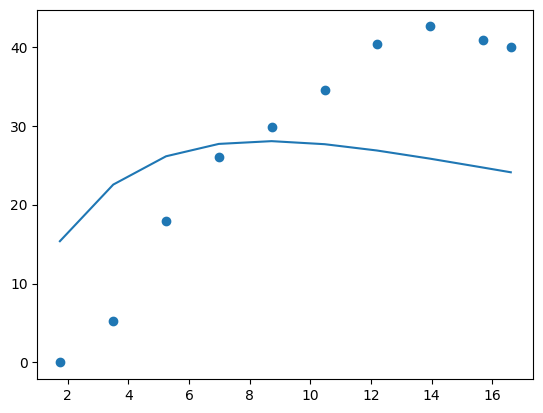

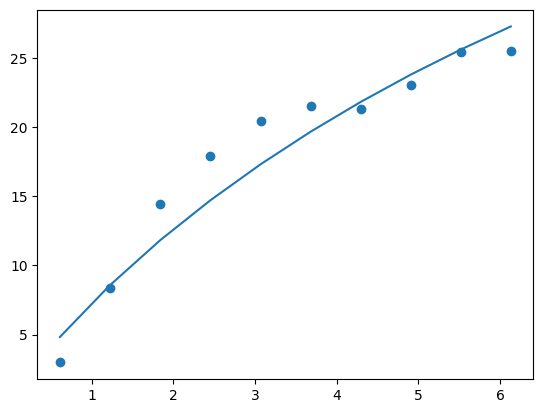

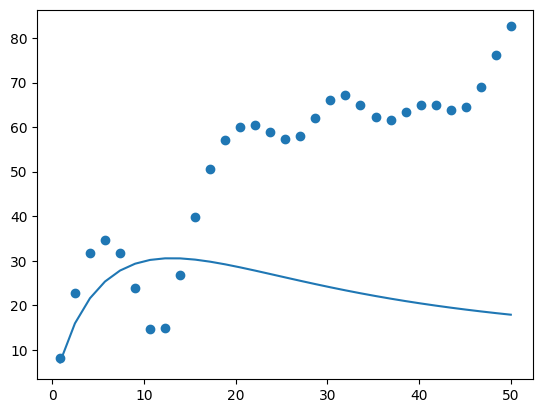

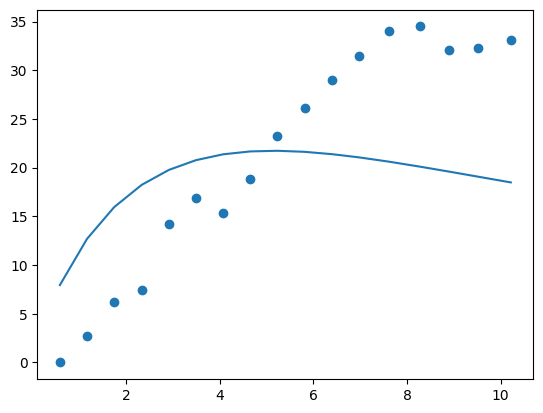

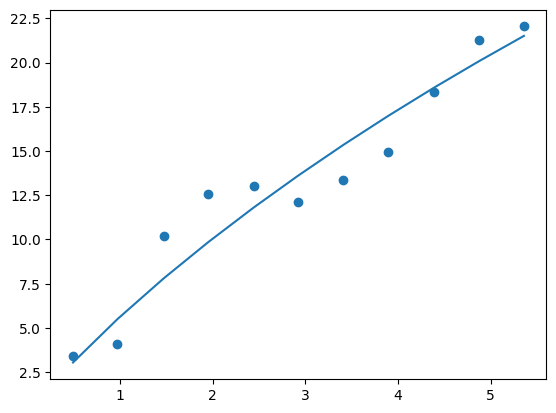

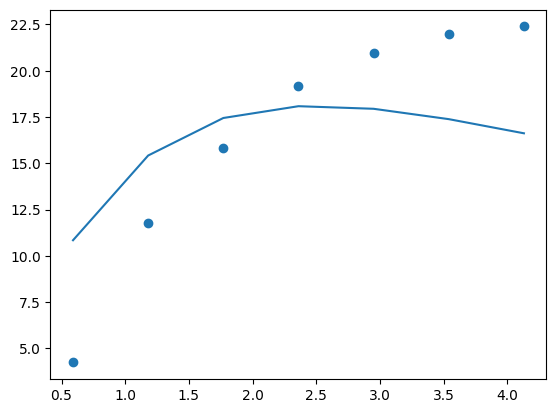

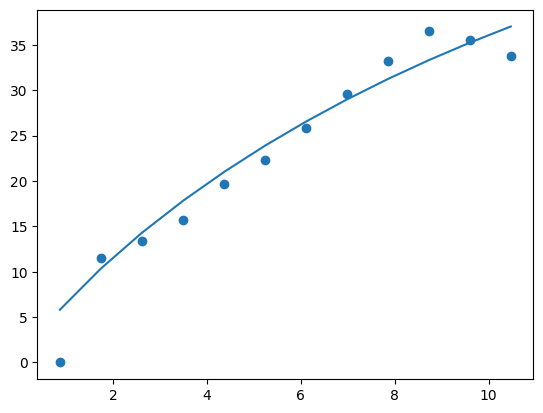

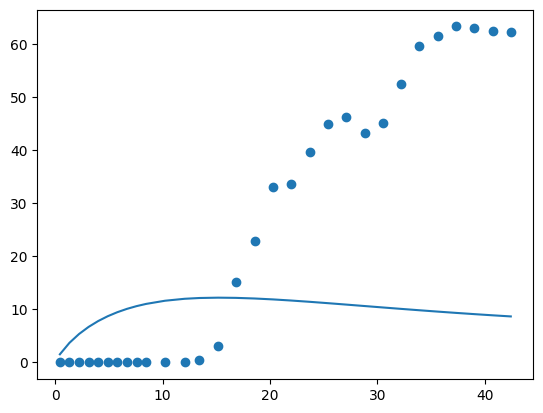

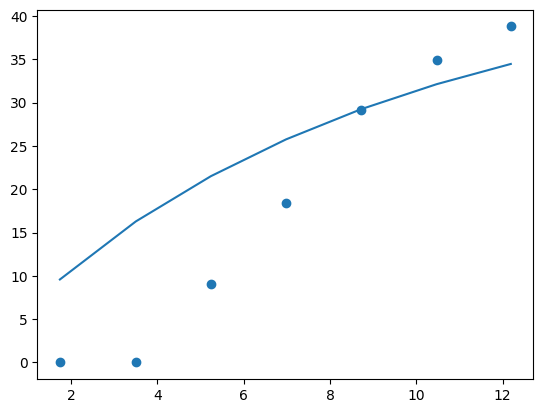

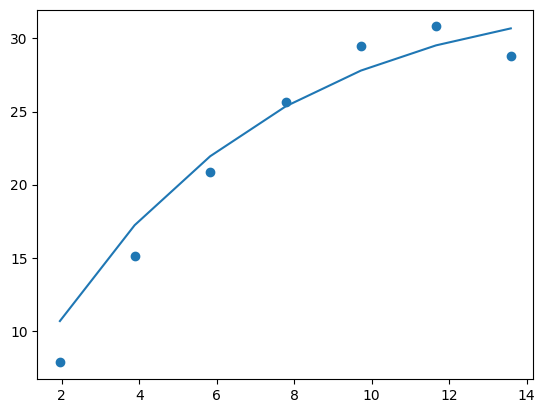

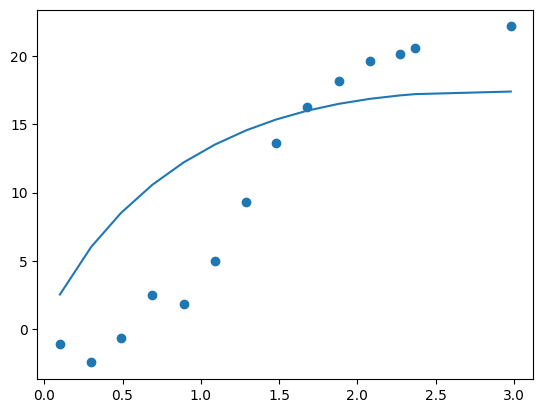

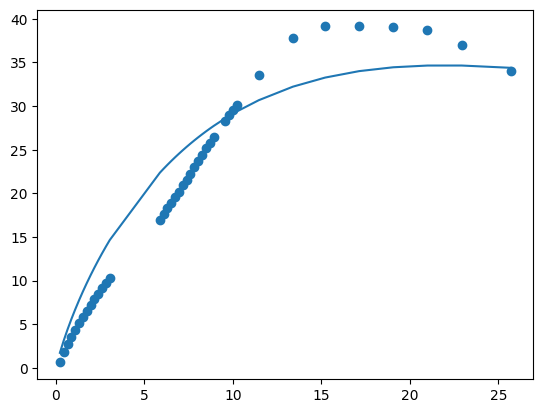

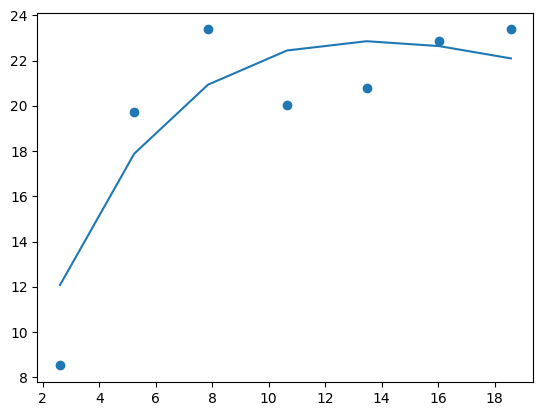

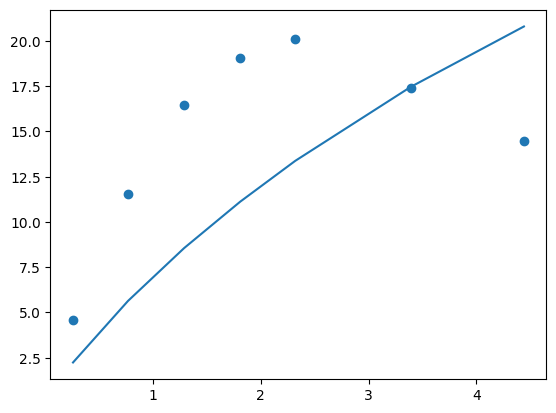

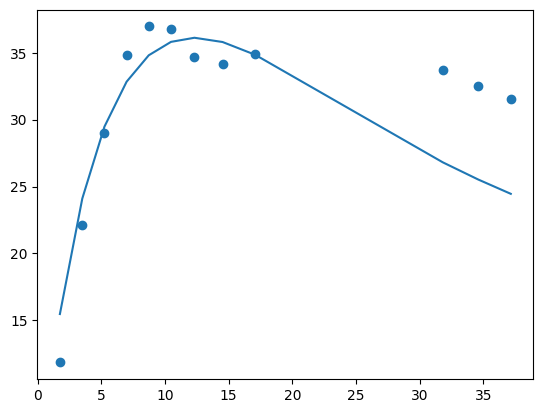

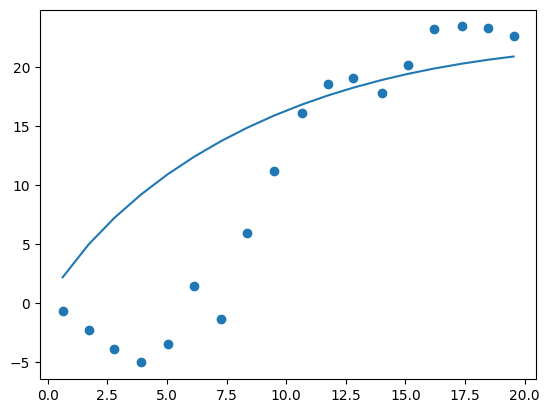

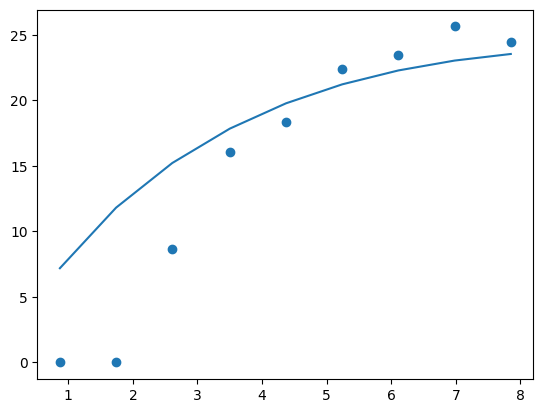

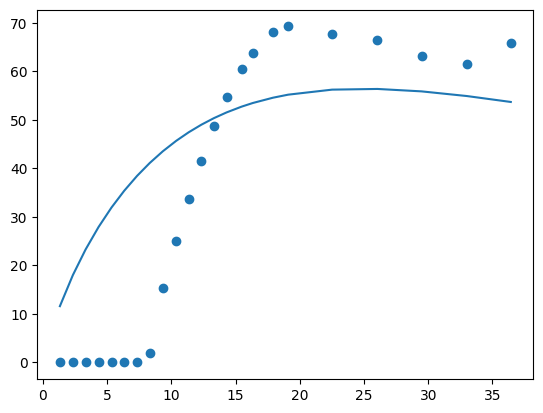

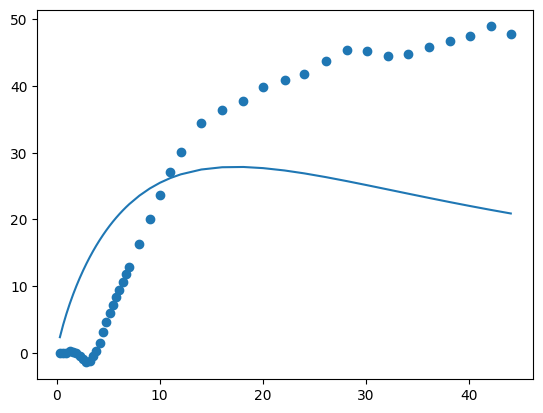

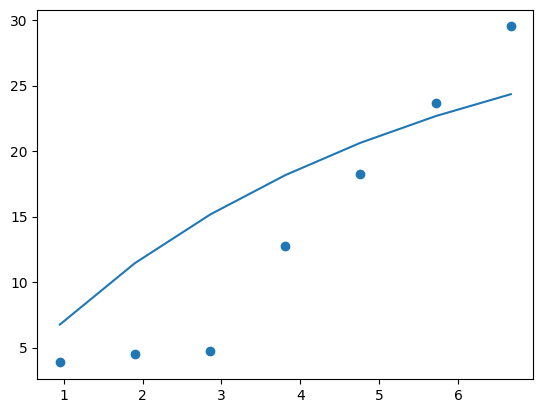

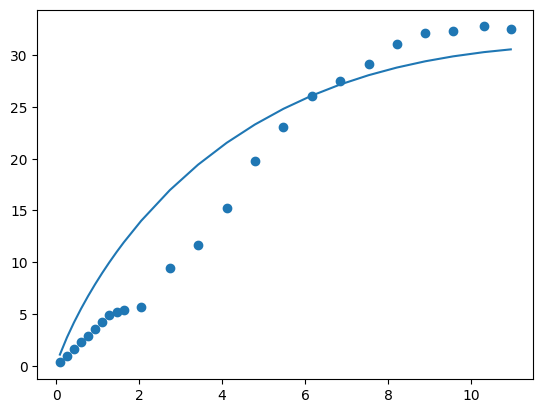

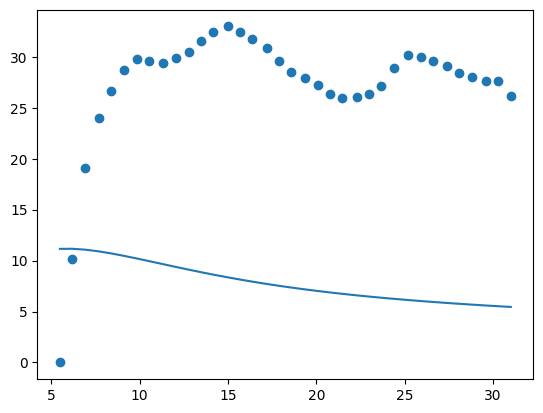

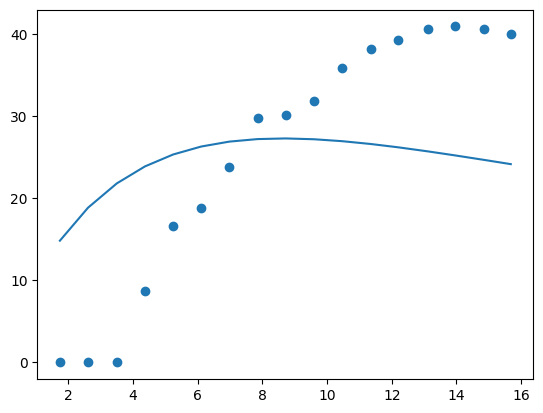

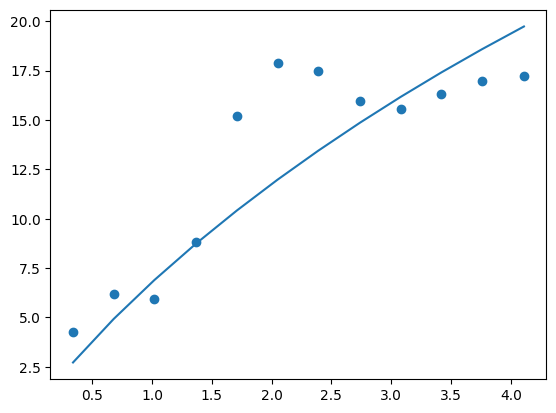

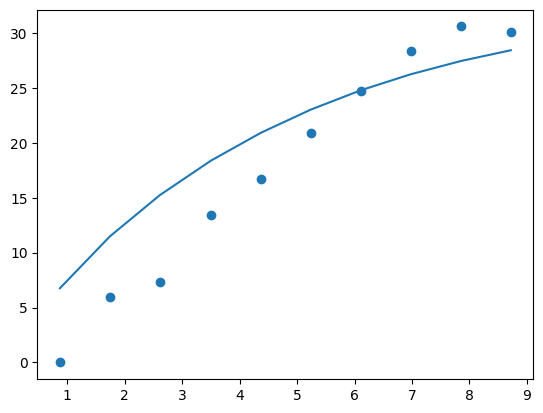

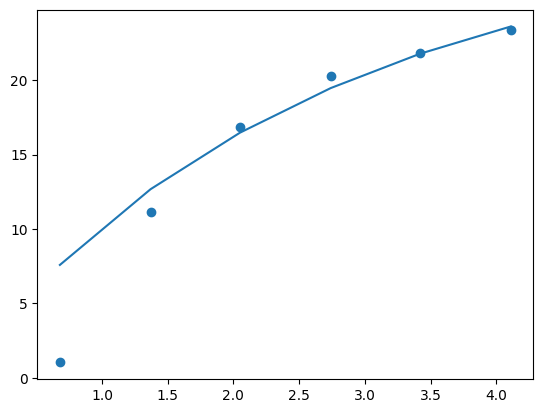

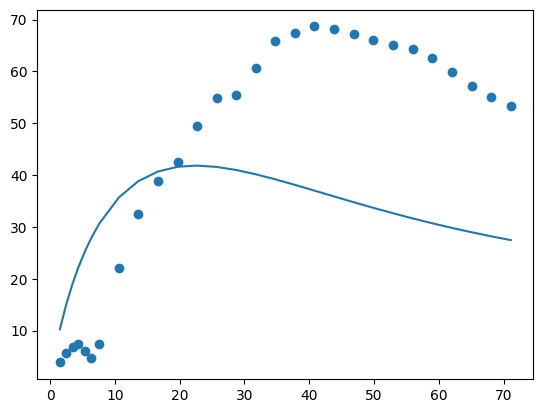

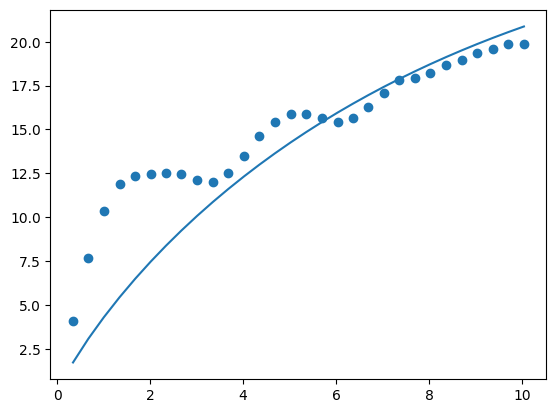

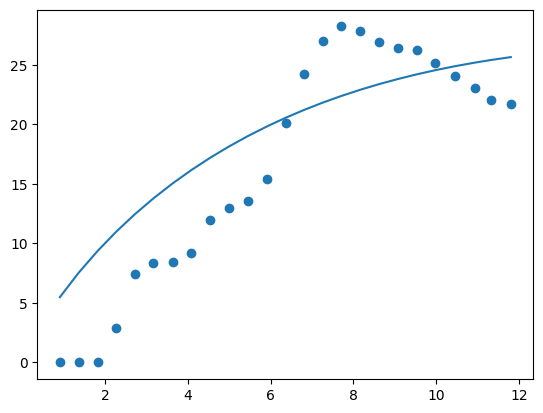

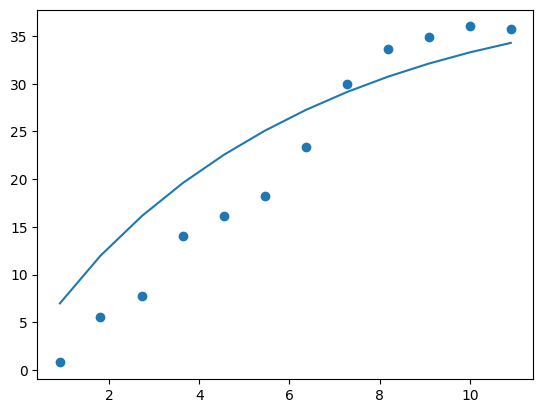

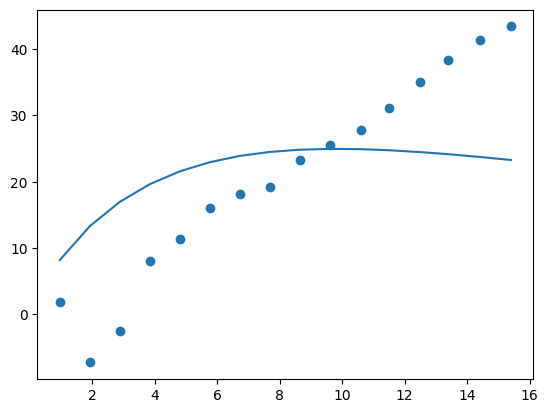

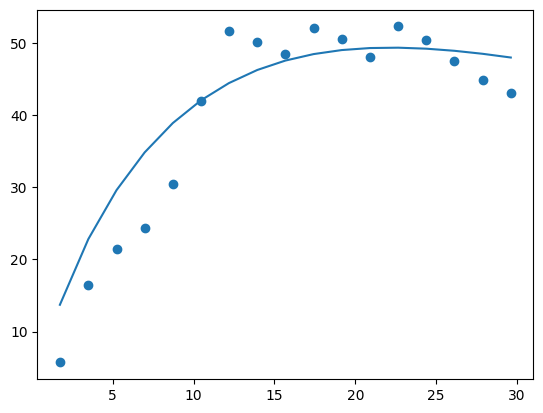

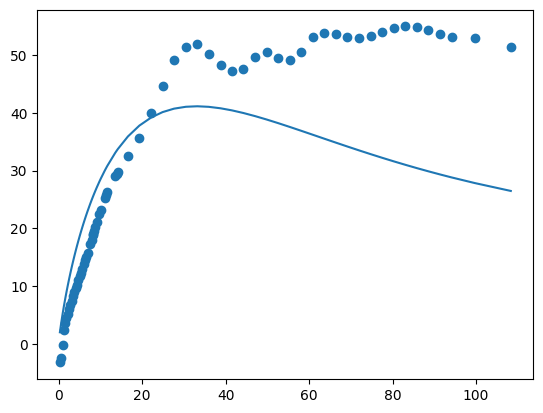

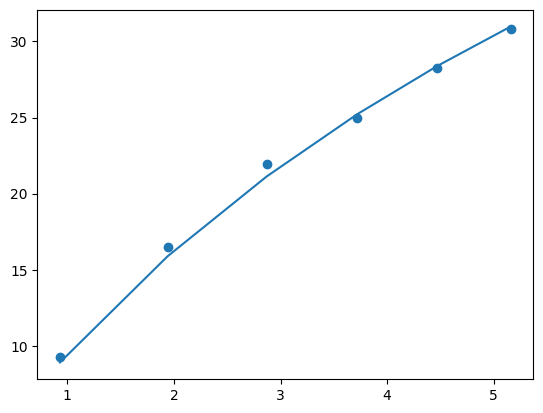

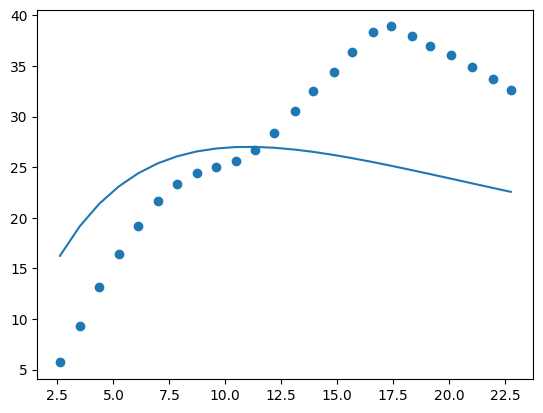

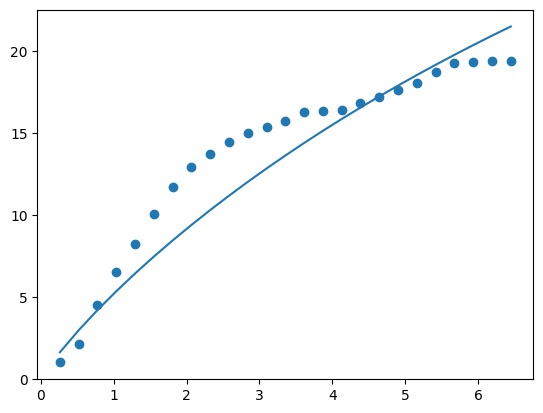

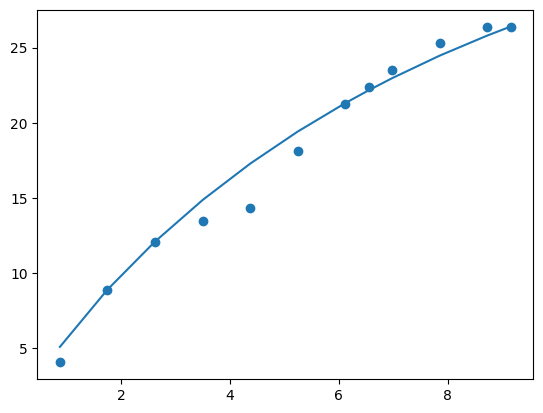

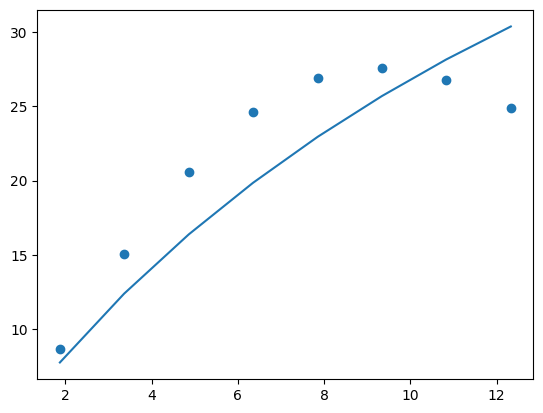

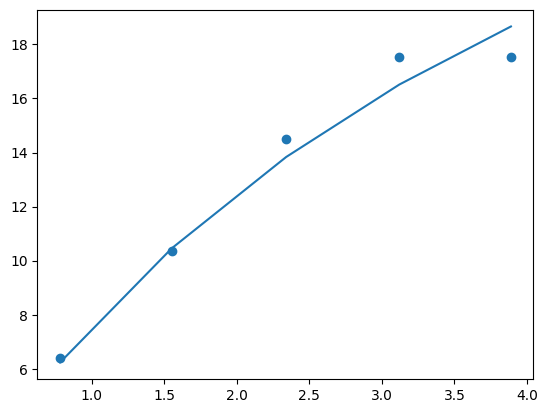

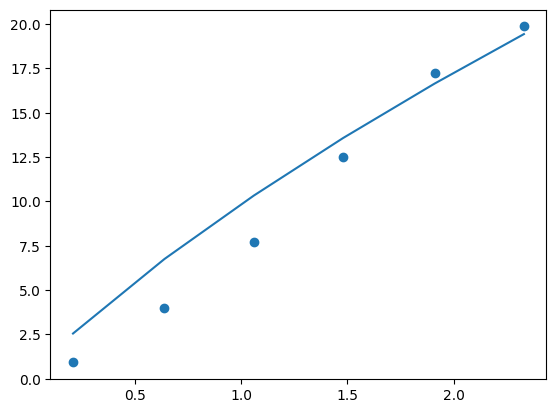

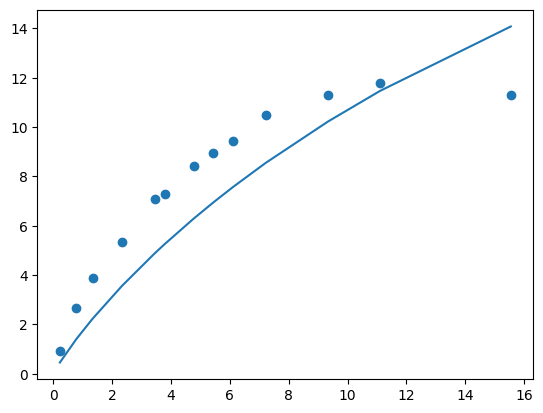

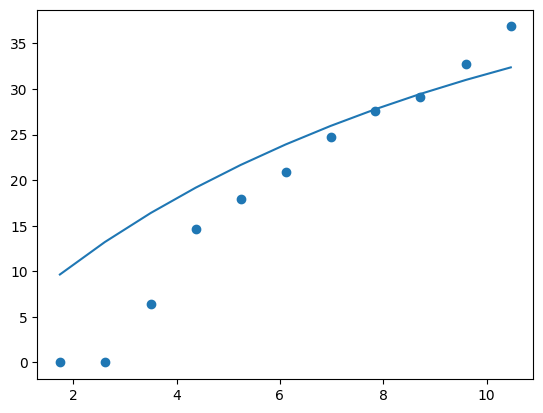

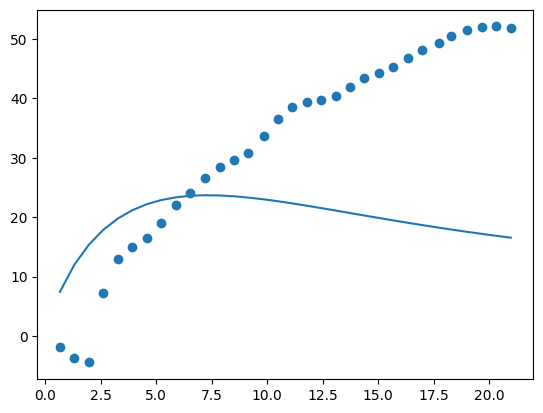

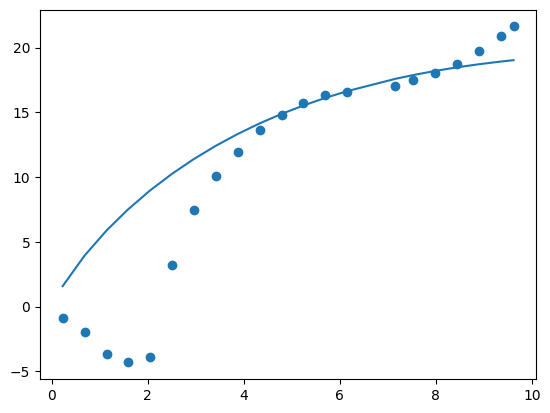

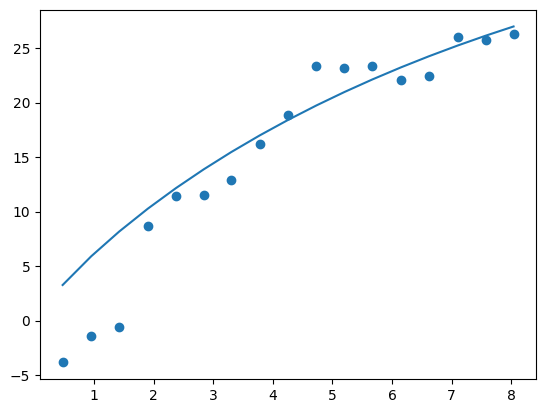

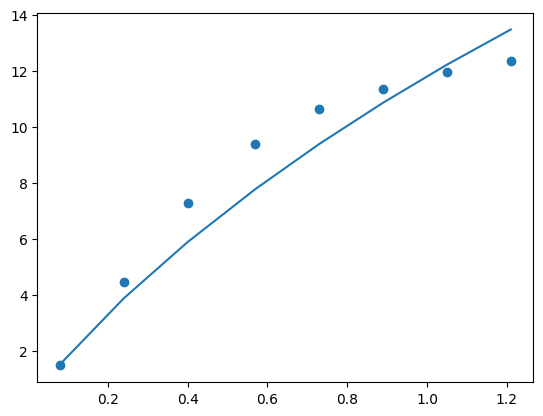

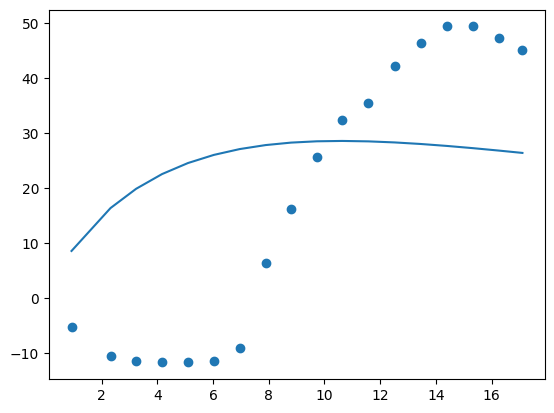

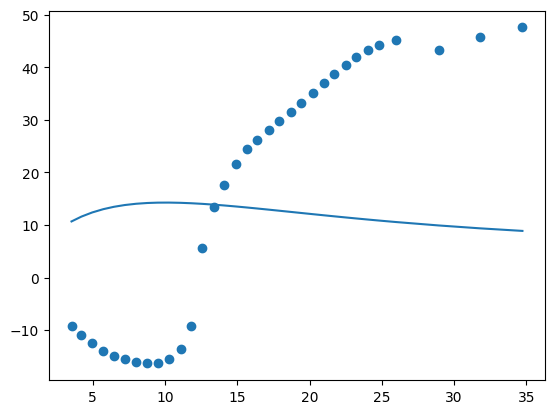

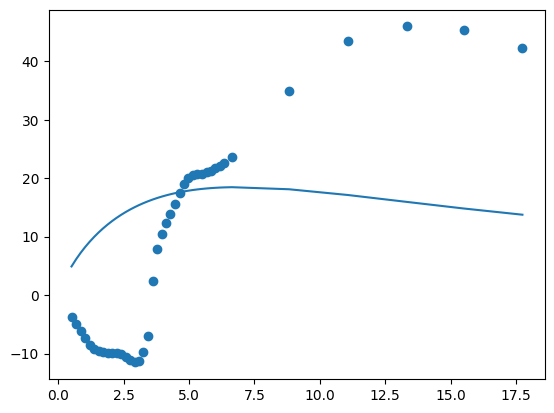

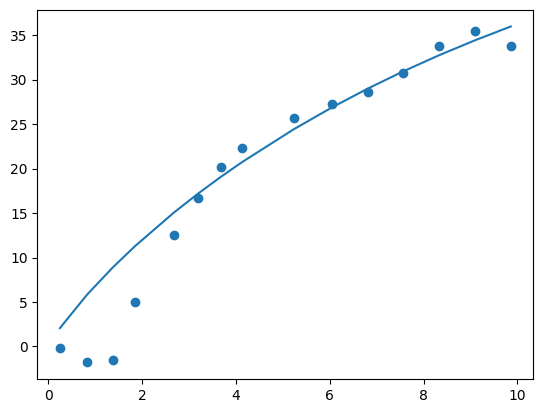

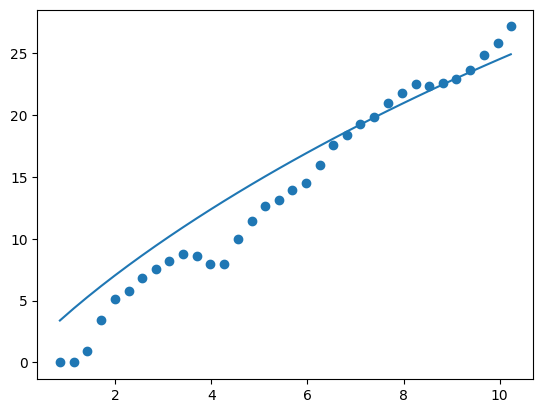

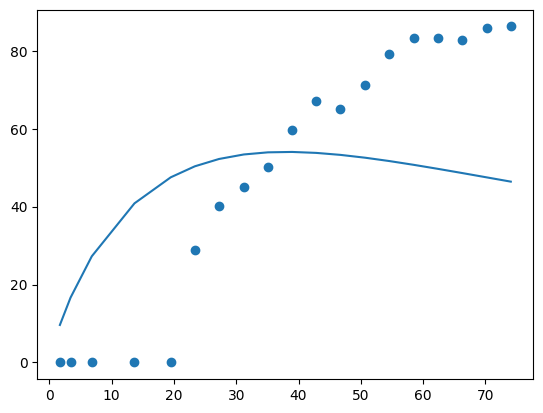

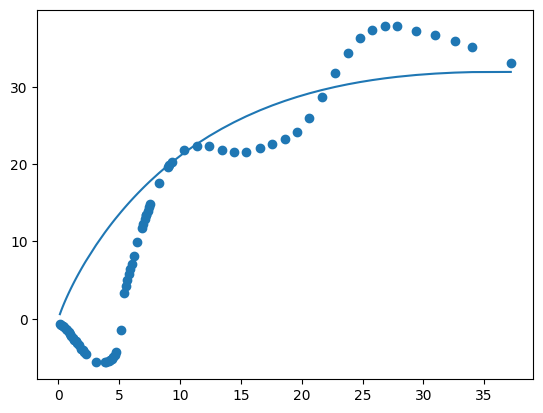

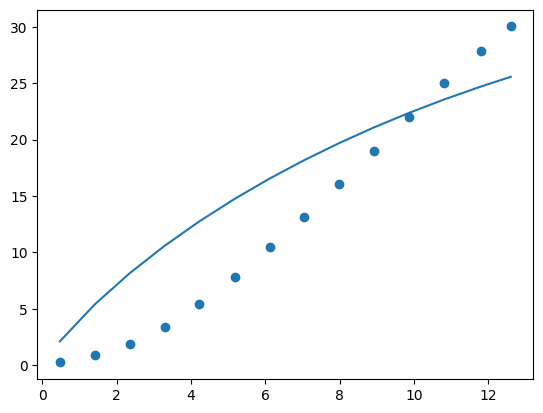

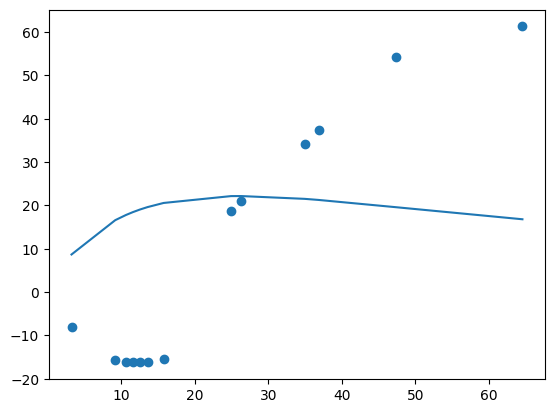

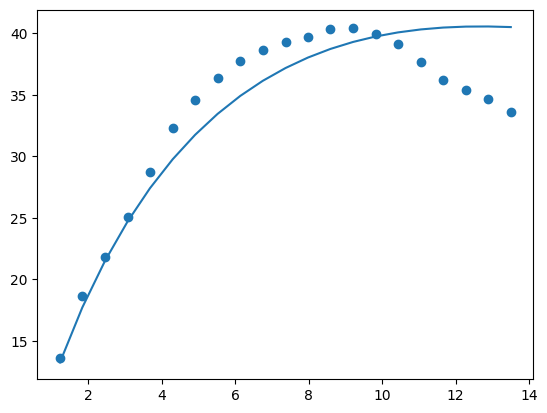

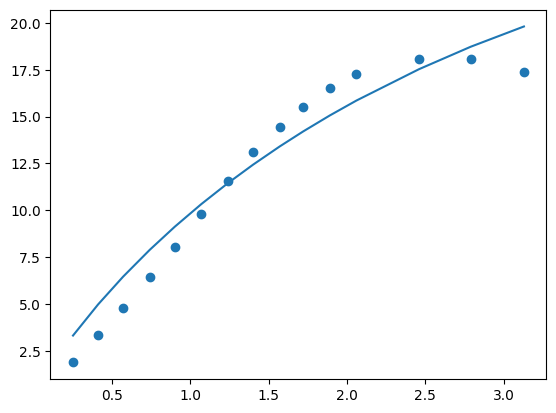

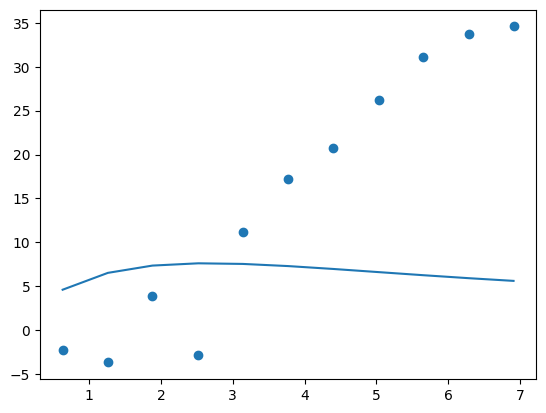

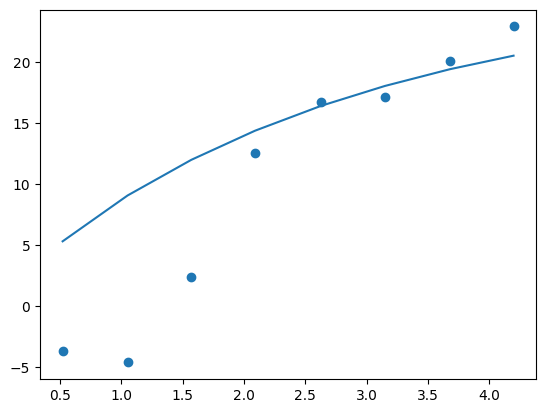

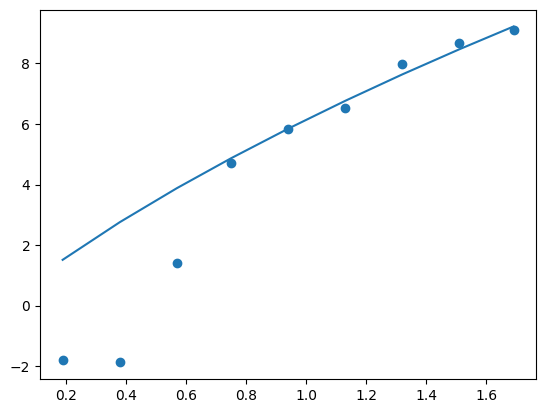

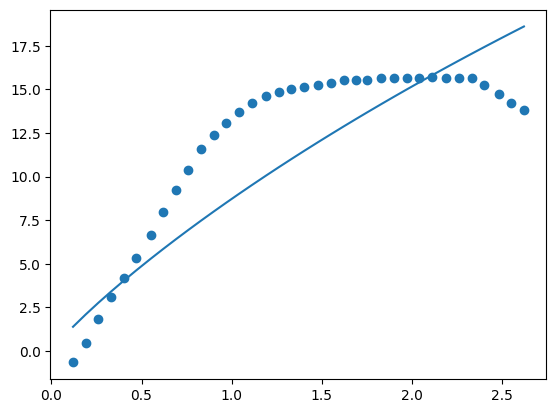

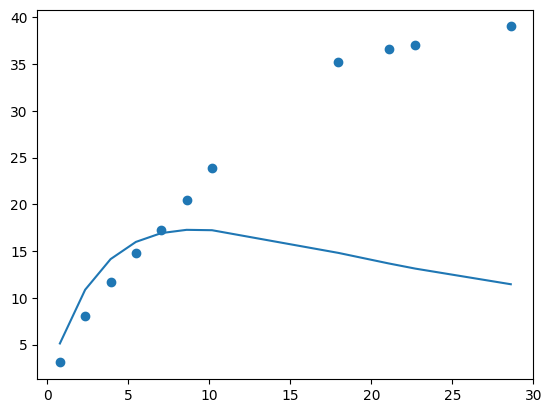

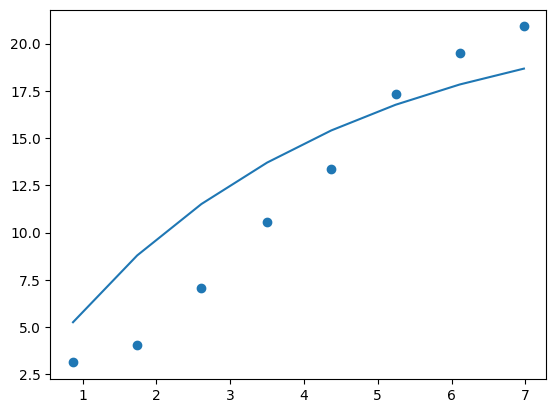

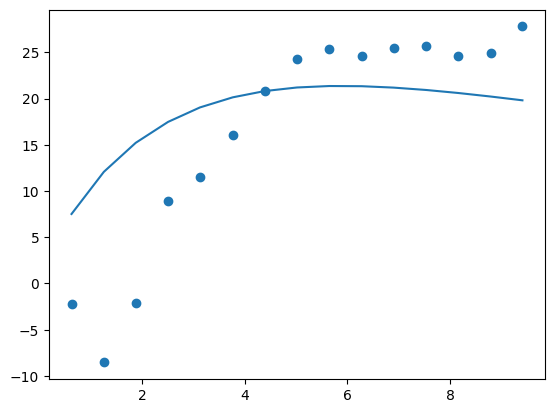

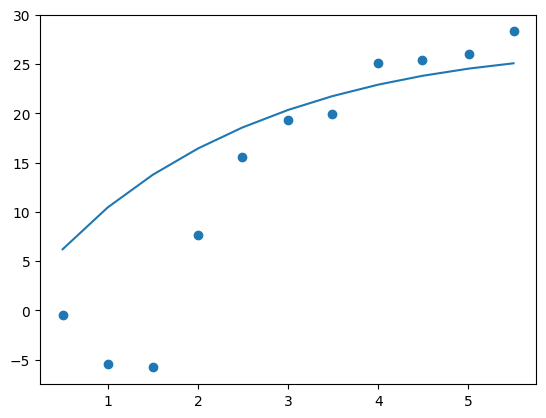

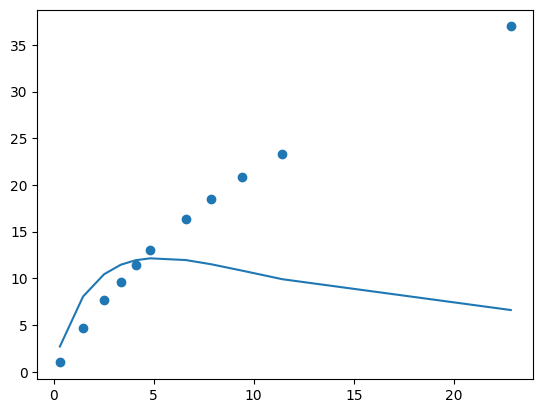

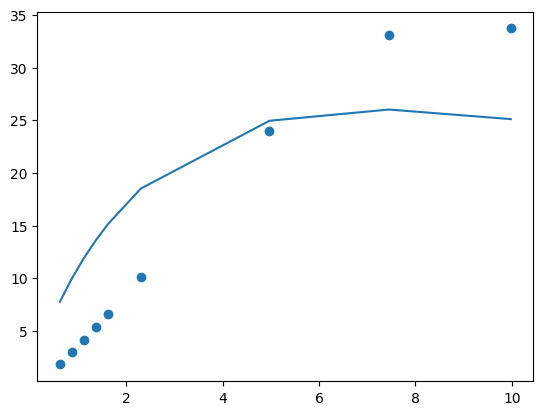

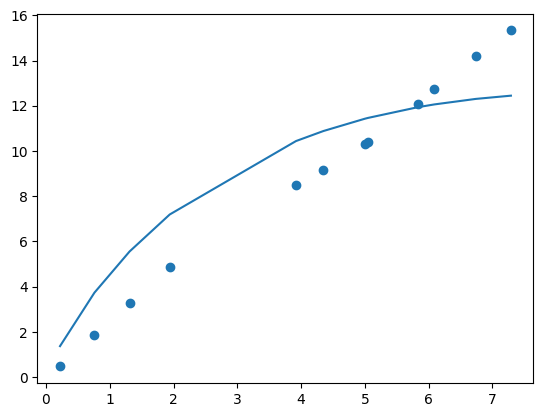

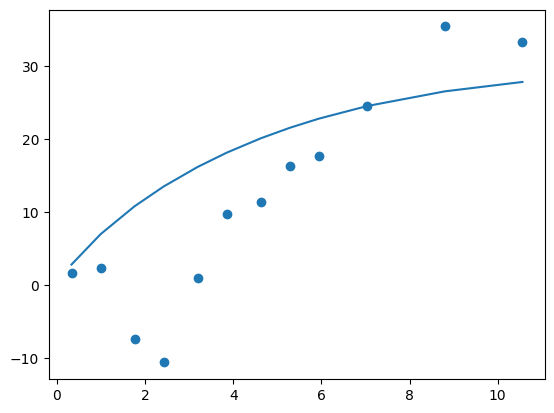

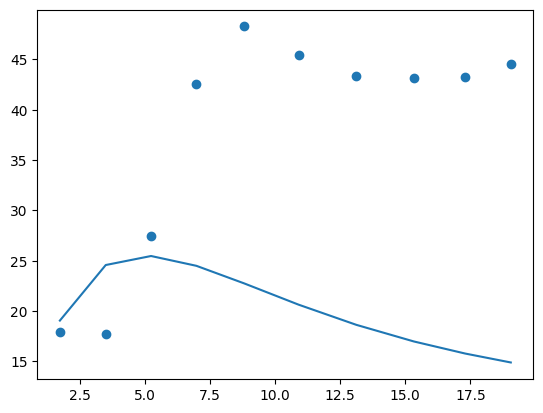

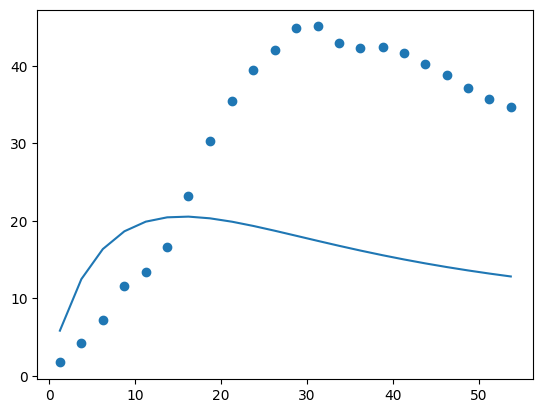

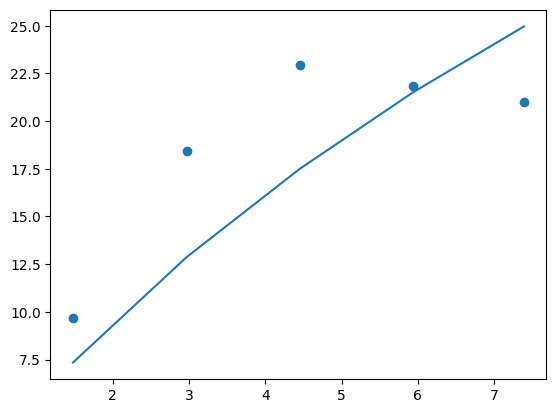

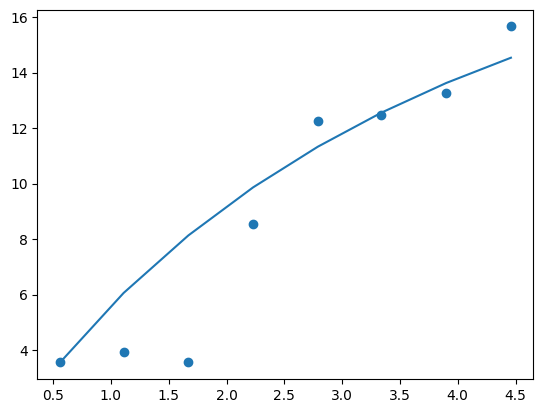

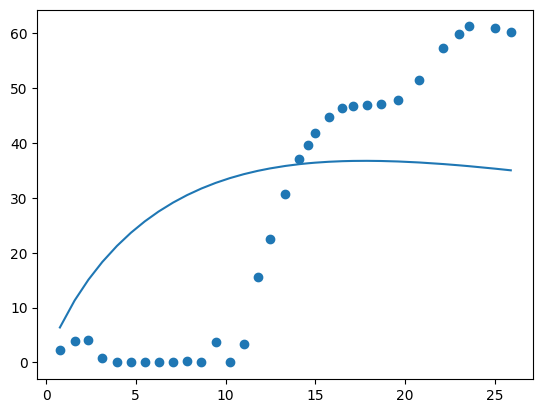

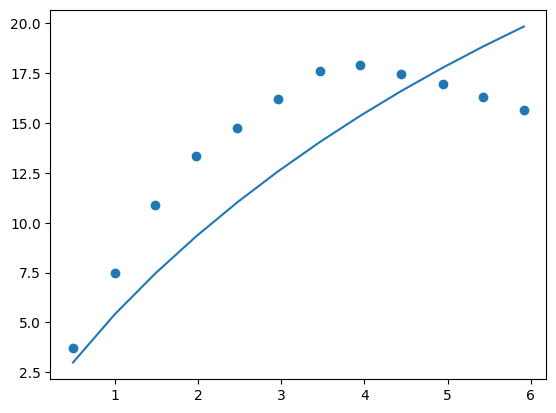

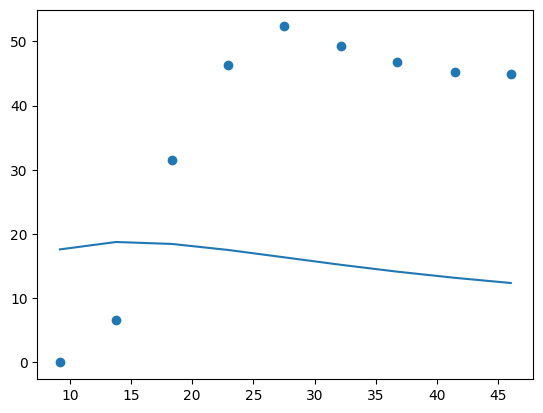

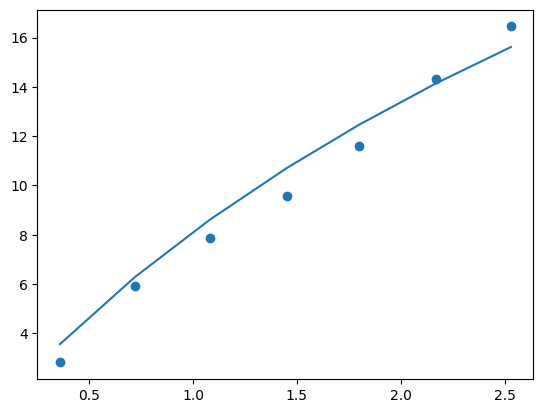

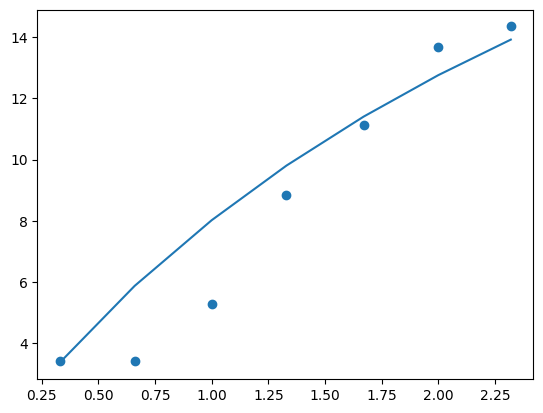

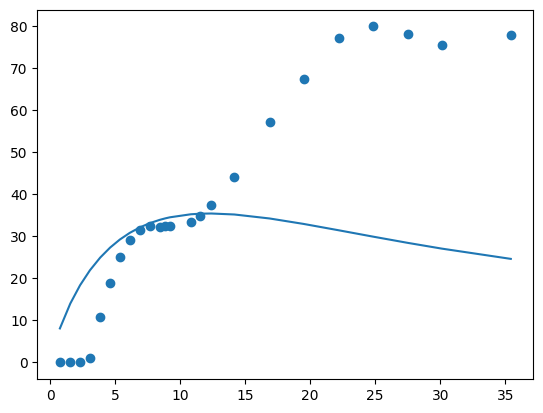

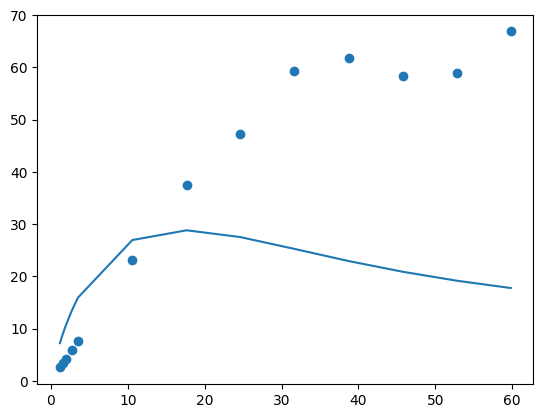

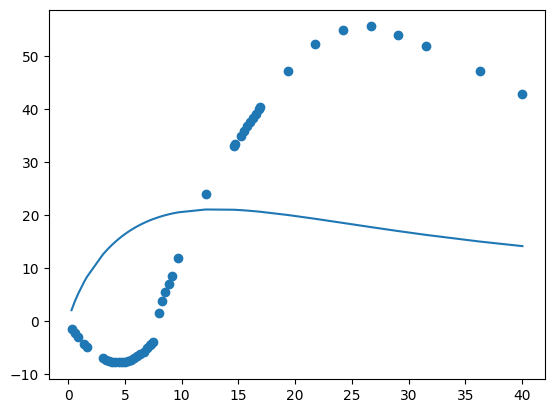

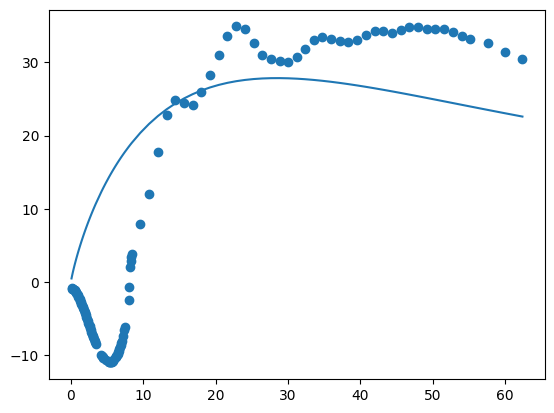

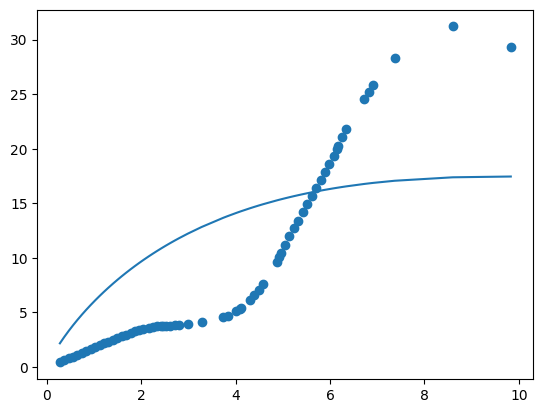

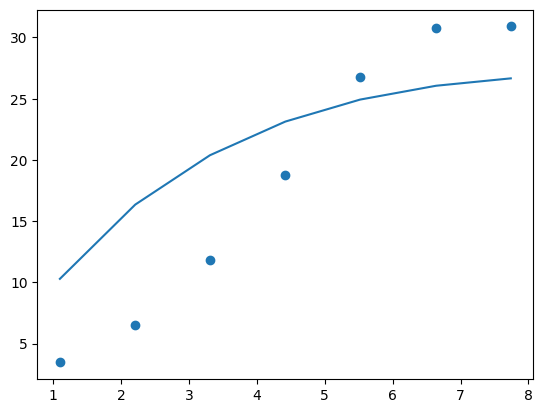

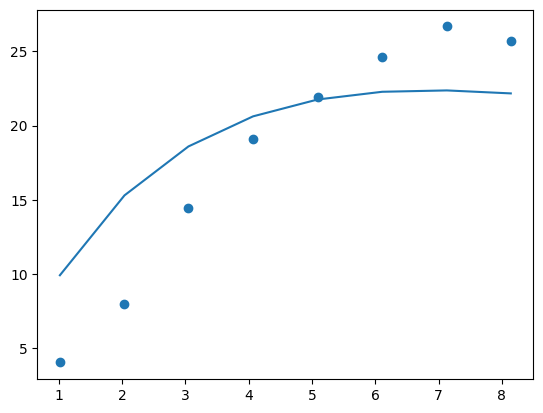

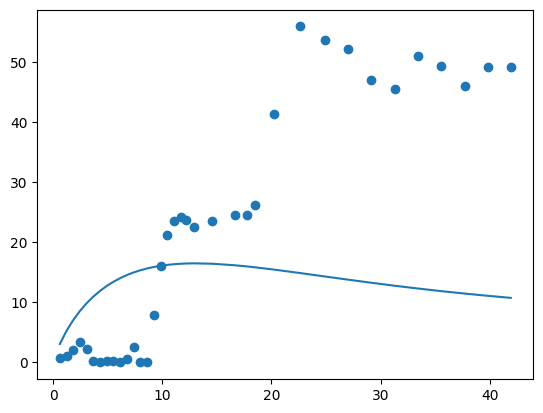

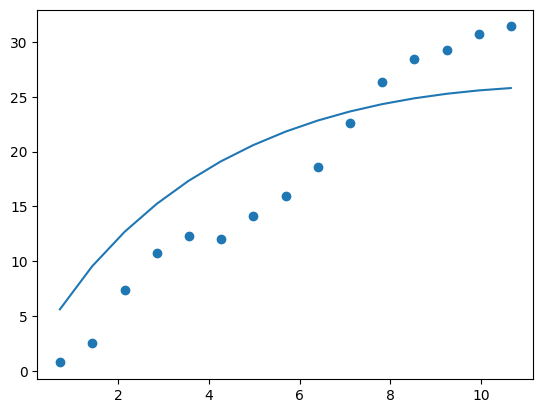

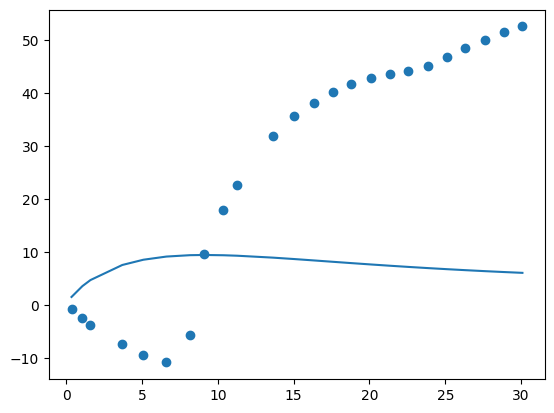

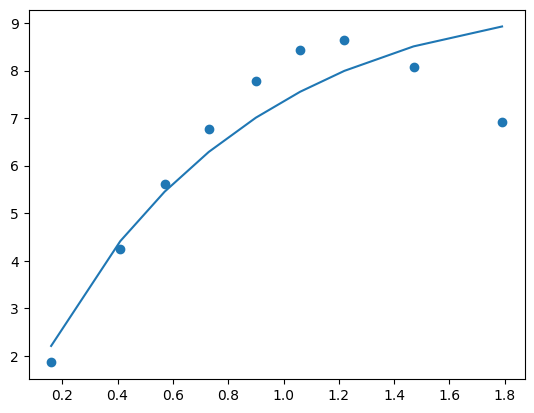

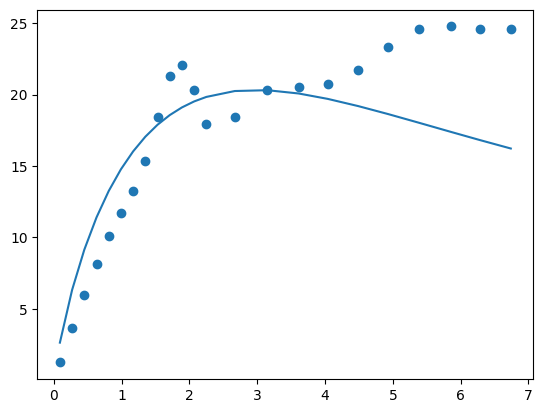

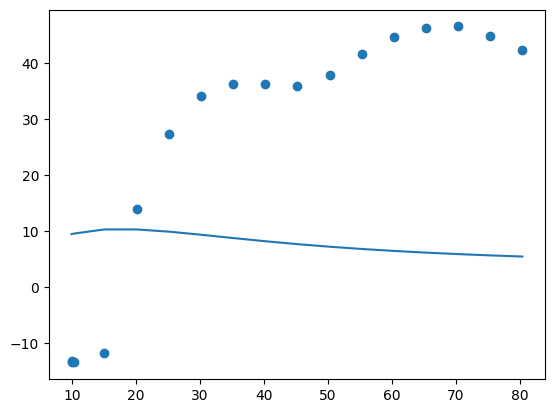

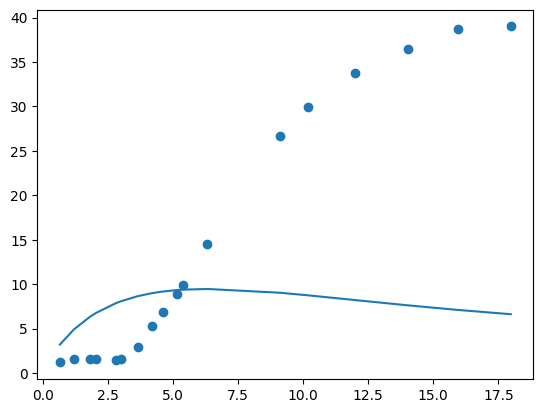

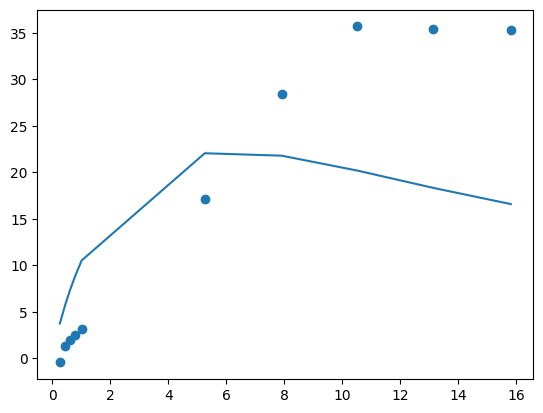

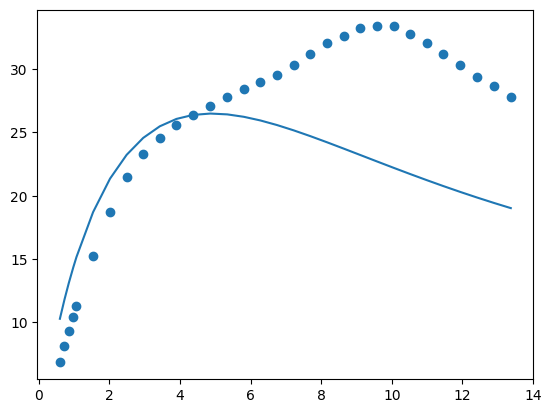

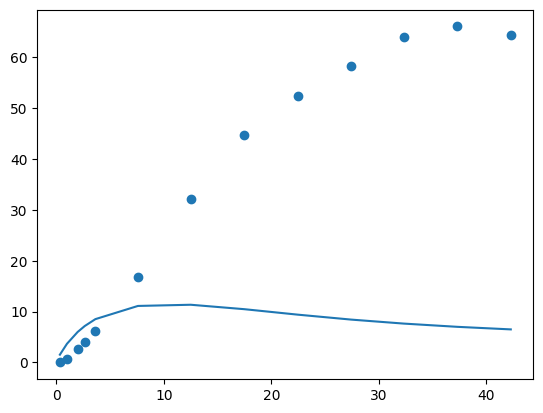

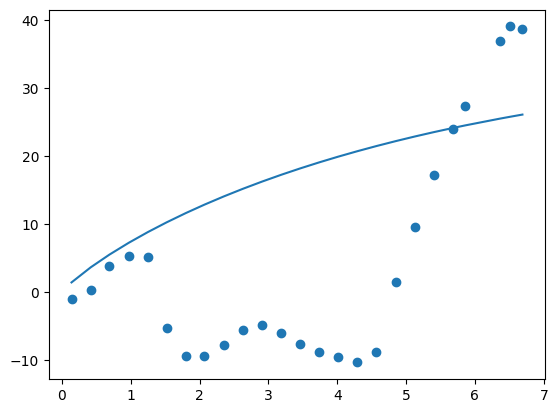

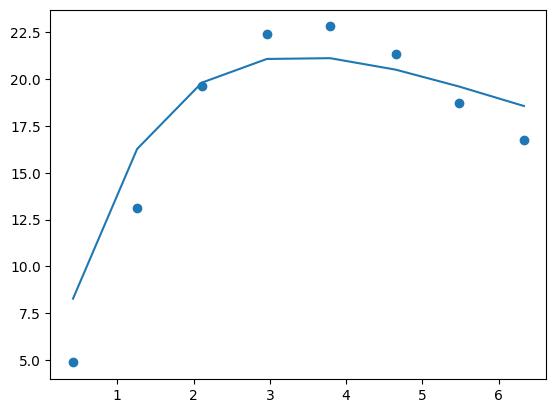

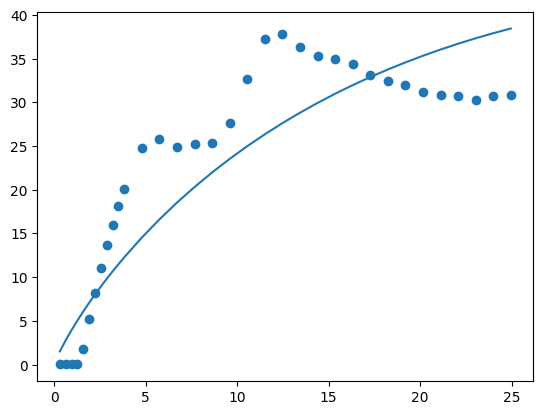

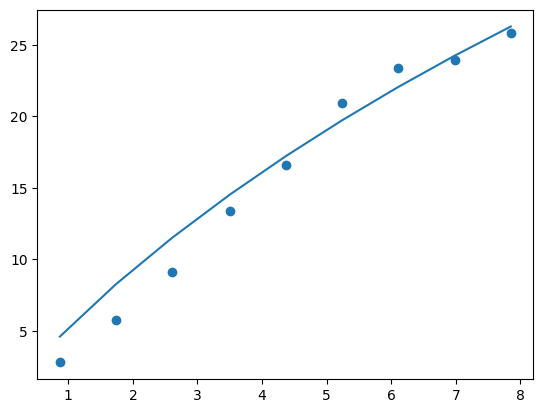

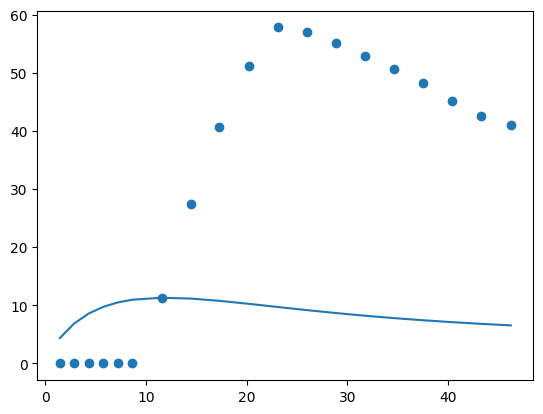

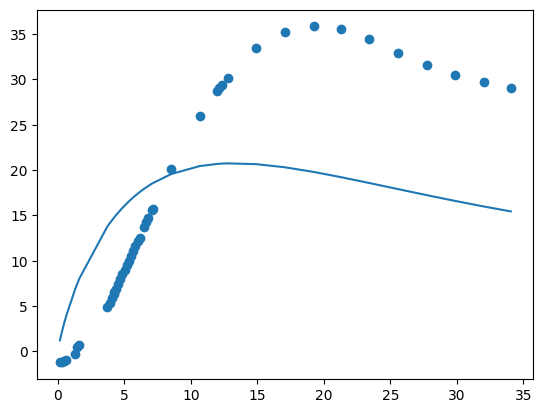

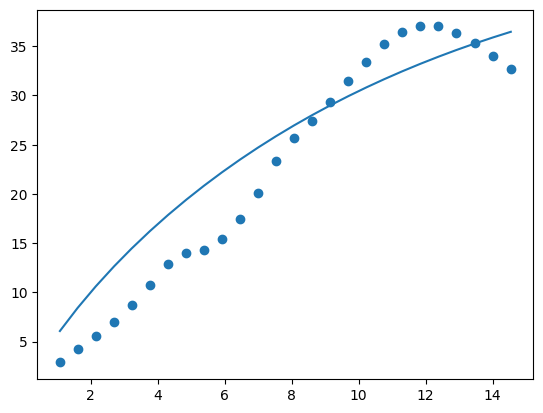

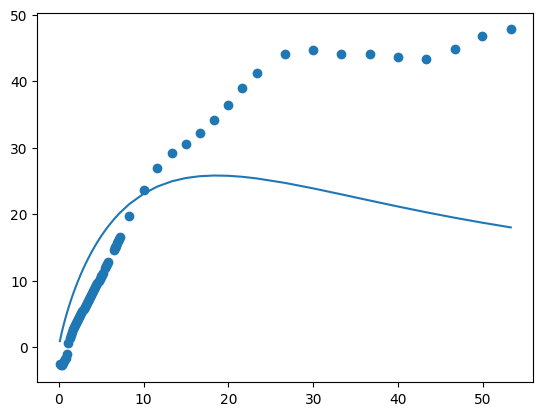

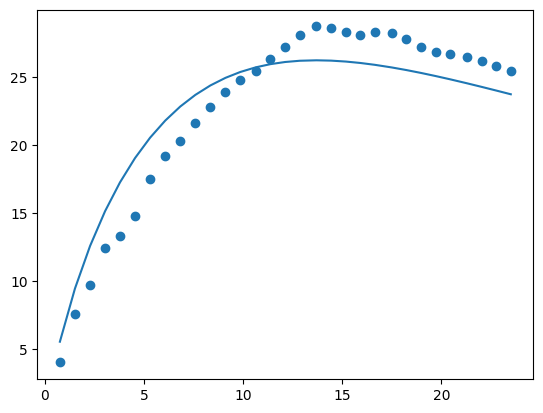

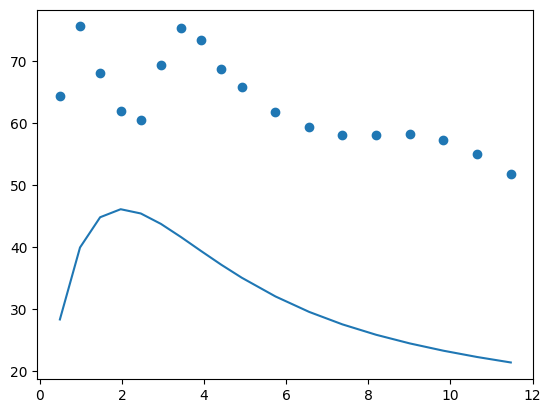

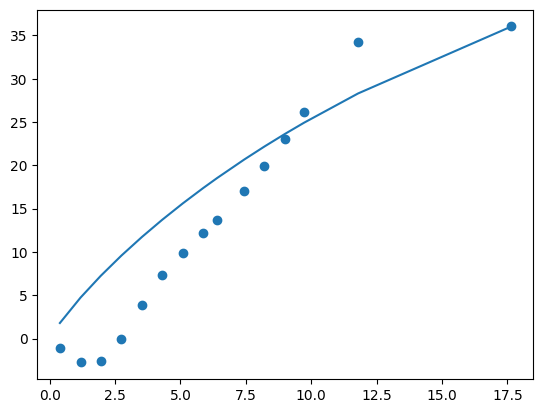

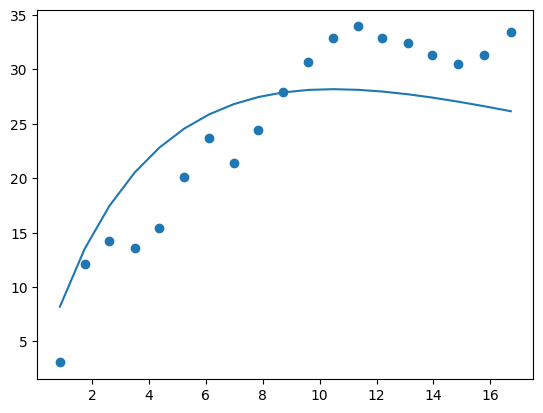

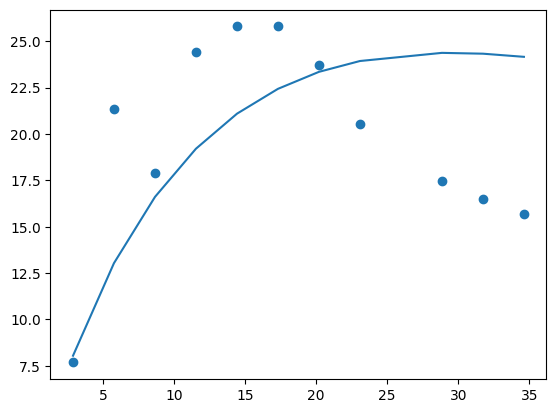

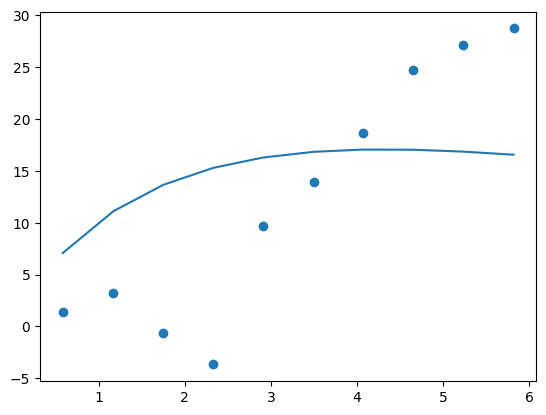

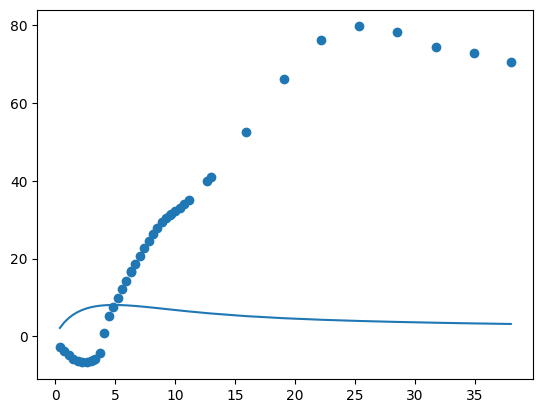

In [13]:
i=0
for gal in gal_uniq:
    dx=combined_gal[combined_gal['Galaxy']==gal]
    rx=dx['Rad']
    vdx=dx['Vgas']
    rad=np.linspace(0,np.max(rx))
    plt.figure()
    plt.scatter(rx,vdx)
    plt.plot(rx,(vgas(rx*kpc,sd_guess[i],rd_val[i]))**(1/2))
    i=i+1

In [10]:
c=5.248
print(f"The value is {c:.2f}")

The value is 5.25
